In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as lin
import multiprocessing

def f(x,i):
    return x * a[i] + c[i]

In [55]:

"""control factor of total number of lines!!"""
ss = 20                 # total line number
dens = 2               # point in dx is 1
l_lim = -20            # lower limit of grid
h_lim = 20             # upper limit of grid 
d_lim = h_lim - l_lim              ## do not need to change!!! # delta grid width

x = np.linspace(l_lim,h_lim,d_lim*dens)
y = np.ones((ss,d_lim*dens))


f_y = np.ones([ss,d_lim*dens])

f_y.size

1600

In [56]:
""" 
optimal => a : randn * 5, b: randn * 20
"""


' \noptimal => a : randn * 5, b: randn * 20\n'

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


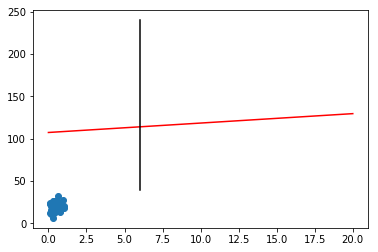

CPU times: user 10.4 s, sys: 68.4 ms, total: 10.4 s
Wall time: 10.5 s


In [61]:
%%time

# chage the random value selections !!  then see the result!

sol_len = 100

sol_set = np.random.randn(2,sol_len)



for tt in range(sol_len):
    a = np.random.randn(ss,1) * 5
    a = np.tan(np.random.randint(0,360,size=20))
    a = a.reshape(ss,1)
    c =  np.random.randn(ss,1) * 2
    for i in range(ss):
        f_y[i] = x
    
    f_y = x * a + c
    xx, yy = np.meshgrid(x,x)
    sol = np.zeros((d_lim*dens,d_lim*dens))
    sol.size
    for i in range(d_lim*dens):
        for j in range(d_lim*dens):
            sol[i][j] = (  (np.abs(a)/np.sqrt(a*a+1))  *  np.abs(xx[i,j]-((yy[i,j]/a)-c/a ))  ).sum()

    ii = (sol.argmin() // (d_lim*dens))
    jj = sol.argmin() - (d_lim*dens * ii) 



    """ make the matrice of A"""
    aa = np.ones((ss,2)).T
    aa[0] = -a.reshape(1,-1)
    A = aa.T

    A_pse = lin.inv(np.dot(A.T,A))
    ATA = np.dot(A_pse, A.T)
    B = np.dot(ATA,c)
    ans = np.array([x[jj], x[ii]])

    sol_set[0][tt] = np.sqrt((ans[0] - B[0]) ** 2 + (ans[1] - B[1]) ** 2)
    sol_set[1][tt] = sol.min()
    
    
an = pd.DataFrame(sol_set.T)
an.columns = ["dist", "min_val"]

xxx = np.linspace(0,20,200)
x_ = np.ones(200)*6

plt.scatter(an.dist, an.min_val)
plt.plot(xxx, 1.1131*xxx + 107.4183,c="r" )

plt.plot(x_, xxx*10+40, c="k")
plt.show()

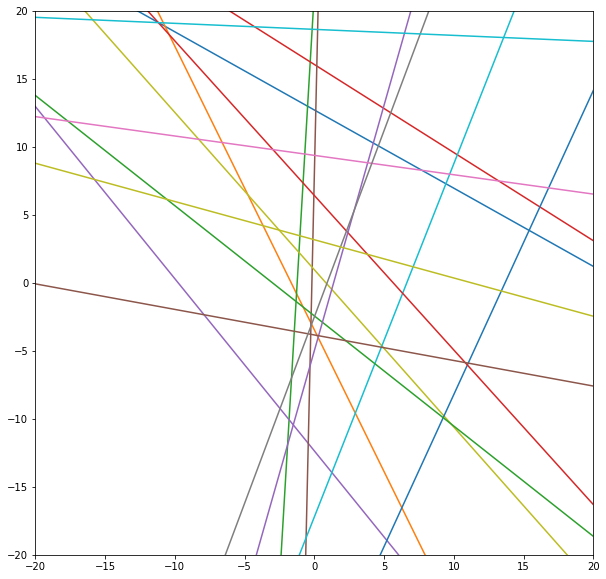

44
[ 4.1754131]


In [48]:


a = np.tan(np.random.randint(0,360,size=20))
a = a.reshape(ss,1)
c =  np.random.randn(ss,1) * 20

for i in range(ss):
    f_y[i] = x
f_y = x * a + c

"""control total number of lines;;"""
k = ss

plt.figure(figsize=(10,10))
for i in range(k):
    plt.plot(x, f_y[i])
plt.ylim([l_lim,h_lim])
plt.xlim([l_lim,h_lim])
plt.show()


xx, yy = np.meshgrid(x,x)
sol = np.zeros((d_lim*dens,d_lim*dens))
sol.size

for i in range(d_lim*dens):
    for j in range(d_lim*dens):
        sol[i][j] = (  (np.abs(a)/np.sqrt(a*a+1))  *  np.abs(xx[i,j]-((yy[i,j]/a)-c/a ))  ).sum()

ii = (sol.argmin() // (d_lim*dens))
print(ii)
jj = sol.argmin() - (d_lim*dens * ii) 



""" make the matrice of A"""
aa = np.ones((ss,2)).T
aa[0] = -a.reshape(1,-1)
A = aa.T

A_pse = lin.inv(np.dot(A.T,A))
ATA = np.dot(A_pse, A.T)
B = np.dot(ATA,c)
ans = np.array([x[jj], x[ii]])

print(np.sqrt((ans[0] - B[0]) ** 2 + (ans[1] - B[1]) ** 2))

In [42]:
a

array([[-0.72810713],
       [-0.02063563],
       [ 2.42591004],
       [ 1.88680814],
       [-2.4582887 ],
       [ 6.00919571],
       [-3.14055348],
       [-4.39131845],
       [-2.30088538],
       [-1.1999582 ],
       [-0.09750172],
       [-4.36190599],
       [ 4.65051521],
       [ 3.73203732],
       [-1.35169893],
       [ 2.87275523],
       [-3.40612545],
       [ 1.82233045],
       [ 3.30334236],
       [-0.38481202]])

In [33]:
c

array([[ -1.41840422],
       [ -7.61647212],
       [  4.13485164],
       [ -9.84175613],
       [  0.35331471],
       [ 11.3131667 ],
       [  1.94360571],
       [  0.81979309],
       [  5.8236305 ],
       [-10.50202458],
       [ -2.92668311],
       [ -2.47739577],
       [ -6.29571044],
       [-10.47948562],
       [  5.28638165],
       [ -4.70951787],
       [ -2.6445032 ],
       [  0.53543235],
       [ -2.2981835 ],
       [ -0.594642  ]])